# Testing validity with IL Synthesis Dataset

## Import Synthesis Dataset

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [107]:
def loadDataset(path):
    a = pd.read_csv(path)
    return a.drop(a.columns[0], axis=1)
def groupByRace(dataset):
    return dataset.groupby(by = ["race"])
def groupByFIPS(dataset):
    return dataset.groupby(by = ["FIPS"])
def groupByFIPSAndRace(dataset):
    return dataset.groupby(by = ["FIPS", "race"])

In [108]:
ILdataset = loadDataset('./data/generatedDatasets/IL_dataset_500thousand.csv')

In [109]:
ILdataset.groupby(by = ["FIPS"]).FIPS.count()

FIPS
170010001001007    3
170010001001008    8
170010001001009    1
170010001001010    4
170010001001011    2
                  ..
172030307003200    2
172030307003202    1
172030307003203    1
172030307003205    2
172030307003210    2
Name: FIPS, Length: 165752, dtype: int64

In [110]:
ILdataset.groupby(by = ["race"]).FIPS.count()

race
P1_003N    307527
P1_004N     70578
P1_005N      3765
P1_006N     29068
P1_007N       177
P1_008N     44347
P1_011N      4314
P1_012N      4174
P1_013N      3570
P1_014N       117
P1_015N     27137
P1_016N       503
P1_017N       228
P1_018N        21
P1_019N       908
P1_020N        42
P1_021N         9
P1_022N       875
P1_023N        93
P1_024N       198
P1_025N        69
P1_027N       423
P1_028N       111
P1_029N         9
P1_030N       318
P1_031N        79
P1_032N         9
P1_033N       747
P1_034N        74
P1_035N       134
P1_036N        10
P1_037N        14
P1_038N         6
P1_039N        35
P1_040N        12
P1_041N        14
P1_042N         3
P1_044N         5
P1_045N         3
P1_046N         4
P1_048N        45
P1_049N         3
P1_050N       129
P1_051N         1
P1_052N        12
P1_054N         3
P1_055N         7
P1_057N         3
P1_058N         1
P1_059N         1
P1_060N         1
P1_061N         1
P1_062N         1
P1_063N        31
P1_064N        14
P1_06

In [111]:
ILdataset.groupby(by = ["FIPS","race"]).FIPS.agg(['count'])

,,count
FIPS,race,
170010001001007,P1_003N,3
170010001001008,P1_003N,8
170010001001009,P1_003N,1
170010001001010,P1_003N,4
170010001001011,P1_003N,2
...,...,...
172030307003200,P1_012N,1
172030307003202,P1_003N,1
172030307003203,P1_003N,1


In [112]:
ILDatasetProcessed = pd.DataFrame(ILdataset.groupby(by = ["FIPS","race"]).FIPS.agg(['count'])).reset_index()
ILDatasetProcessed

,FIPS,race,count
0,170010001001007,P1_003N,3
1,170010001001008,P1_003N,8
2,170010001001009,P1_003N,1
3,170010001001010,P1_003N,4
4,170010001001011,P1_003N,2
...,...,...,...
243573,172030307003200,P1_012N,1
243574,172030307003202,P1_003N,1
243575,172030307003203,P1_003N,1
243576,172030307003205,P1_003N,2


## Import Real FIPS Data

In [113]:
from state import StateByBlockGroup
StateIL = StateByBlockGroup("17")
StateIL.decennialData

,GEO_ID,NAME,P1_001N,P1_001NA,P1_002N,P1_002NA,P1_003N,P1_003NA,P1_004N,P1_004NA,...,P1_069N,P1_069NA,P1_070N,P1_070NA,P1_071N,P1_071NA,state,county,tract,block
0,1000000US170010001001000,"Block 1000, Block Group 1, Census Tract 1, Ada...",17,NaN,17,NaN,16,NaN,1,NaN,...,0,NaN,0,NaN,0,NaN,17,1,100,1000
1,1000000US170010001001001,"Block 1001, Block Group 1, Census Tract 1, Ada...",2,NaN,2,NaN,1,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,17,1,100,1001
2,1000000US170010001001002,"Block 1002, Block Group 1, Census Tract 1, Ada...",0,NaN,0,NaN,0,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,17,1,100,1002
3,1000000US170010001001003,"Block 1003, Block Group 1, Census Tract 1, Ada...",0,NaN,0,NaN,0,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,17,1,100,1003
4,1000000US170010001001004,"Block 1004, Block Group 1, Census Tract 1, Ada...",0,NaN,0,NaN,0,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,17,1,100,1004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369973,1000000US172030307003228,"Block 3228, Block Group 3, Census Tract 307, W...",11,NaN,11,NaN,11,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,17,203,30700,3228
369974,1000000US172030307003229,"Block 3229, Block Group 3, Census Tract 307, W...",0,NaN,0,NaN,0,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,17,203,30700,3229
369975,1000000US172030307003230,"Block 3230, Block Group 3, Census Tract 307, W...",0,NaN,0,NaN,0,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,17,203,30700,3230
369976,1000000US172030307003231,"Block 3231, Block Group 3, Census Tract 307, W...",7,NaN,6,NaN,6,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,17,203,30700,3231


In [114]:
def processRealDataset(datasetdf):
    datasetdf["FIPS"] = datasetdf["GEO_ID"].map(lambda x: x[-15:])
    return datasetdf[["FIPS",
                'P1_003N', 'P1_004N', 'P1_005N', 'P1_006N', 'P1_007N',
                'P1_008N', 'P1_011N', 'P1_012N', 'P1_013N', 'P1_014N',
                'P1_015N', 'P1_016N', 'P1_017N', 'P1_018N', 'P1_019N',
                'P1_020N', 'P1_021N', 'P1_022N', 'P1_023N', 'P1_024N',
                'P1_025N', 'P1_027N', 'P1_028N', 'P1_029N', 'P1_030N',
                'P1_031N', 'P1_032N', 'P1_033N', 'P1_034N', 'P1_035N',
                'P1_036N', 'P1_037N', 'P1_038N', 'P1_039N', 'P1_040N',
                'P1_041N', 'P1_042N', 'P1_043N', 'P1_044N', 'P1_045N',
                'P1_046N', 'P1_048N', 'P1_049N', 'P1_050N', 'P1_051N',
                'P1_052N', 'P1_053N', 'P1_054N', 'P1_055N', 'P1_056N',
                'P1_057N', 'P1_058N', 'P1_059N', 'P1_060N', 'P1_061N',
                'P1_062N', 'P1_063N', 'P1_064N', 'P1_065N', 'P1_066N',
                'P1_067N', 'P1_068N', 'P1_069N', 'P1_071N'
            ]]

In [115]:
processedRealILDataset = processRealDataset(StateIL.decennialData)
processedRealILDataset

,FIPS,P1_003N,P1_004N,P1_005N,P1_006N,P1_007N,P1_008N,P1_011N,P1_012N,P1_013N,...,P1_061N,P1_062N,P1_063N,P1_064N,P1_065N,P1_066N,P1_067N,P1_068N,P1_069N,P1_071N
0,170010001001000,16,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,170010001001001,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,170010001001002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,170010001001003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,170010001001004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369973,172030307003228,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
369974,172030307003229,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
369975,172030307003230,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
369976,172030307003231,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Comparing the two datasets distributions

## By Races

In [116]:
popByRaceSynthesis = ILdataset.groupby(by = ["race"]).FIPS.count()
popByRaceSynthesis

race
P1_003N    307527
P1_004N     70578
P1_005N      3765
P1_006N     29068
P1_007N       177
P1_008N     44347
P1_011N      4314
P1_012N      4174
P1_013N      3570
P1_014N       117
P1_015N     27137
P1_016N       503
P1_017N       228
P1_018N        21
P1_019N       908
P1_020N        42
P1_021N         9
P1_022N       875
P1_023N        93
P1_024N       198
P1_025N        69
P1_027N       423
P1_028N       111
P1_029N         9
P1_030N       318
P1_031N        79
P1_032N         9
P1_033N       747
P1_034N        74
P1_035N       134
P1_036N        10
P1_037N        14
P1_038N         6
P1_039N        35
P1_040N        12
P1_041N        14
P1_042N         3
P1_044N         5
P1_045N         3
P1_046N         4
P1_048N        45
P1_049N         3
P1_050N       129
P1_051N         1
P1_052N        12
P1_054N         3
P1_055N         7
P1_057N         3
P1_058N         1
P1_059N         1
P1_060N         1
P1_061N         1
P1_062N         1
P1_063N        31
P1_064N        14
P1_06

In [117]:
popByRaceReal = processedRealILDataset.drop(['FIPS'], axis=1).sum(axis = 0)
popByRaceReal

P1_003N    7868227
P1_004N    1808271
P1_005N      96498
P1_006N     754878
P1_007N       4501
            ...   
P1_066N         35
P1_067N         14
P1_068N          4
P1_069N         15
P1_071N         84
Length: 64, dtype: int64

### Plot samples

In [118]:
popByRaceSynthesis /= popByRaceSynthesis.sum()
popByRaceReal /= popByRaceReal.sum()

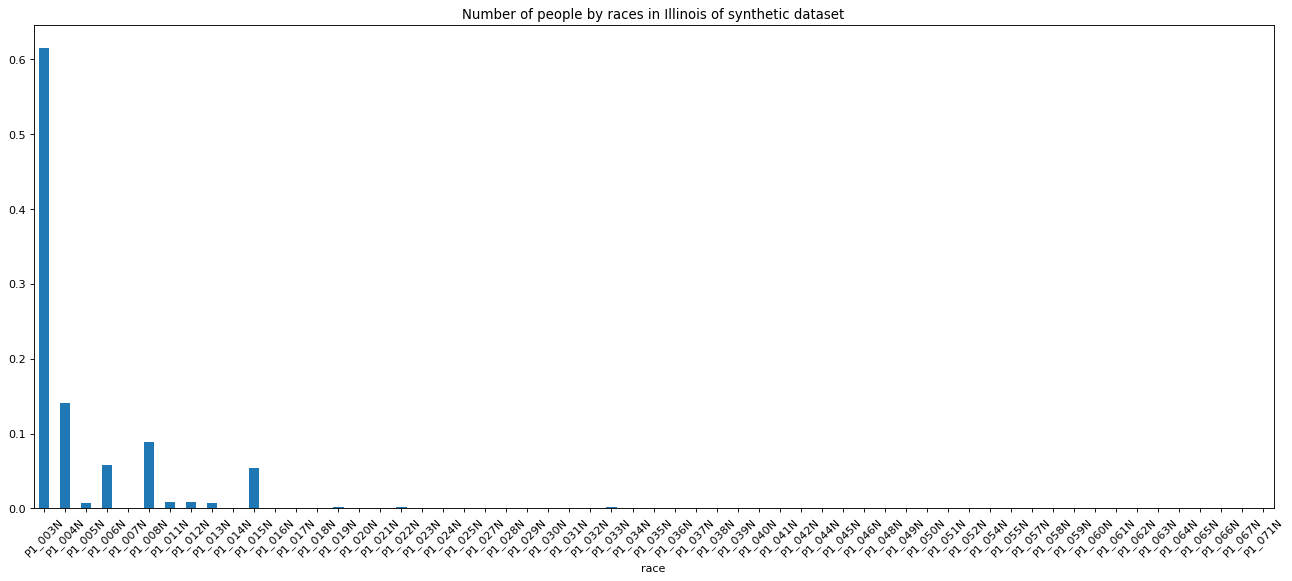

In [119]:
plt.figure(figsize=(20, 8), dpi=80)
popByRaceSynthesis.plot.bar(x='Race', y='Population', rot=0)
plt.title("Number of people by races in Illinois of synthetic dataset")
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

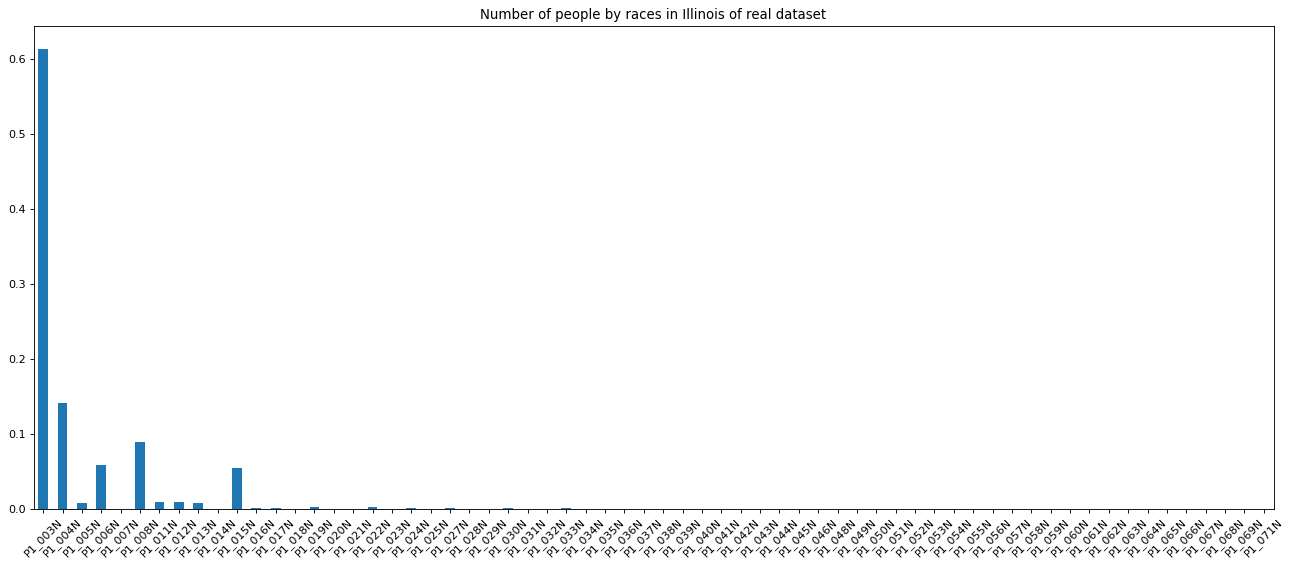

In [120]:
plt.figure(figsize=(20, 8), dpi=80)
popByRaceReal.plot.bar(x='Race', y='Population', rot=0)
plt.title("Number of people by races in Illinois of real dataset")
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

### Compare sample mean and standard deviation

In [121]:
print("Mean of synthetic dataset", popByRaceSynthesis.mean())
print("Standard deviation of synthetic dataset", popByRaceSynthesis.std())

Mean of synthetic dataset 0.01694915254237287
Standard deviation of synthetic dataset 0.0826002813030222


In [122]:
print("Mean of real dataset", popByRaceReal.mean())
print("Standard deviation of real dataset", popByRaceReal.std())

Mean of real dataset 0.015625
Standard deviation of real dataset 0.07927505077520923


### Compare distribution by two sample t-test

$H_0: \mu_1 = \mu_2$ (population mean of synthetic dataset is equal to real dataset)

$H_1: \mu_1 \neq \mu_2$ (population mean of synthetic dataset is different from real dataset)

In [123]:
# Perform the two sample t-test with equal variances
stats.ttest_ind(a=popByRaceSynthesis, b=popByRaceReal, equal_var=True)

Ttest_indResult(statistic=0.09070432017161346, pvalue=0.9278775195938433)

Due to p value = 0.9999535792552408 >> 0.05. Therefore, there is no evidence to support population mean of synthetic dataset is different from real dataset.

### Test for Homogeneity

$H_0$: The distributions of the two populations are the same.

$H_1$: The distributions of the two populations are not the same.


In [124]:
popByRaceReal.name = "Real"
popByRaceSynthesis.name = "Synthesis"
mergeddf = pd.merge(popByRaceSynthesis, popByRaceReal, right_index = True,
               left_index = True)

mergeddf

,Synthesis,Real
P1_003N,0.615054,0.614073
P1_004N,0.141156,0.141126
P1_005N,0.007530,0.007531
P1_006N,0.058136,0.058914
P1_007N,0.000354,0.000351
P1_008N,0.088694,0.088592
P1_011N,0.008628,0.008687
P1_012N,0.008348,0.008419
P1_013N,0.007140,0.007096
P1_014N,0.000234,0.000242


In [125]:
stat, p, dof, expected = stats.chi2_contingency(mergeddf)
p

1.0

In [126]:
# interpret test-statistic
prob = 0.95
critical = stats.chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Independent (fail to reject H0)


Due to p value = 0.9908510047877276 >> 0.05. Therefore, there is no evidence to support population mean of synthetic dataset is different from real dataset.

### K-S test

$H_0: $ The two datasets come from the same ditribution 

$H_1: $ The two datasets NOT come from the same ditribution 


In [127]:
stats.ks_2samp(popByRaceSynthesis, popByRaceReal)

KstestResult(statistic=0.11016949152542373, pvalue=0.793950283185846)

Due to p value = 0.9999999044253438 >> 0.05. Therefore, there is no evidence to support the distributions of the two populations are not the same.

## By FIPS

In [128]:
popByFIPSSynthesis = ILdataset.groupby(by = ["FIPS"]).FIPS.count()
popByFIPSSynthesis = popByFIPSSynthesis.rename(lambda x: str(x))
popByFIPSSynthesis

FIPS
170010001001007    3
170010001001008    8
170010001001009    1
170010001001010    4
170010001001011    2
                  ..
172030307003200    2
172030307003202    1
172030307003203    1
172030307003205    2
172030307003210    2
Name: FIPS, Length: 165752, dtype: int64

In [129]:
popByFIPSReal = processedRealILDataset.drop(['FIPS'], axis=1).sum(axis = 1)
popByFIPSReal = popByFIPSReal.rename(processedRealILDataset['FIPS'])
popByFIPSReal

170010001001000    17
170010001001001     2
170010001001002     0
170010001001003     0
170010001001004     0
                   ..
172030307003228    11
172030307003229     0
172030307003230     0
172030307003231     7
172030307003232     0
Length: 369978, dtype: int64

In [130]:
popByFIPSSynthesis /= popByFIPSSynthesis.sum()
popByFIPSReal /= popByFIPSReal.sum()

### Plot samples

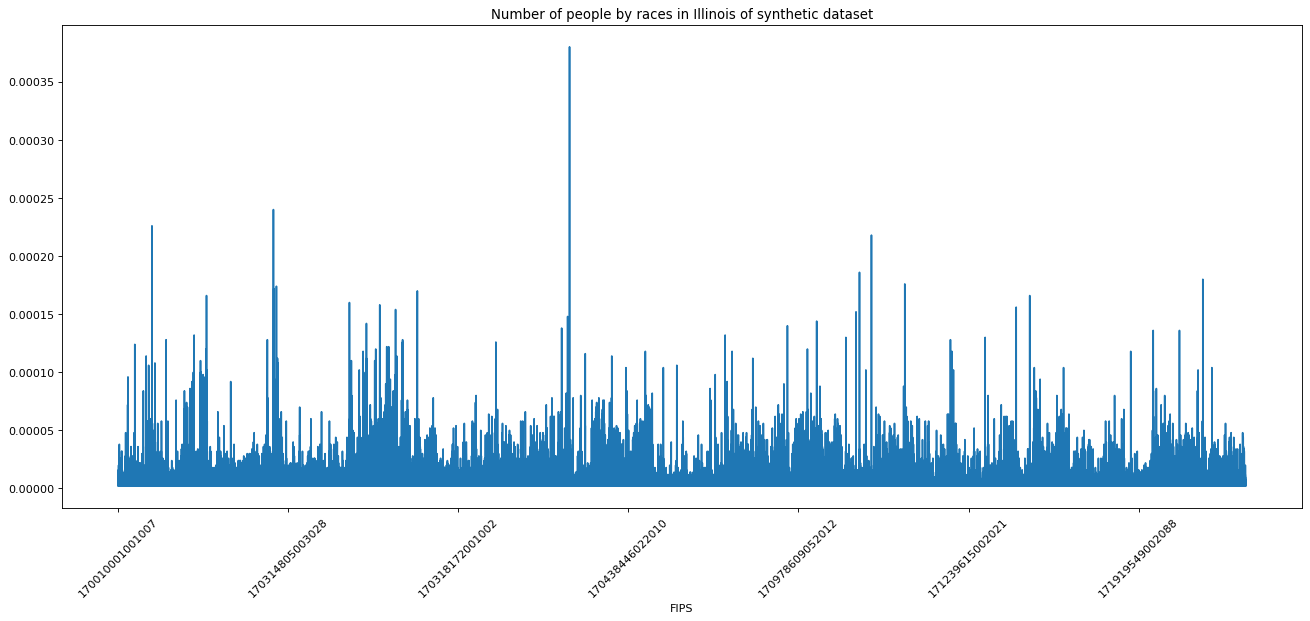

In [131]:
plt.figure(figsize=(20, 8), dpi=80)
popByFIPSSynthesis.plot(x='FIPS', y='Population', rot=0)
plt.title("Number of people by races in Illinois of synthetic dataset")
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

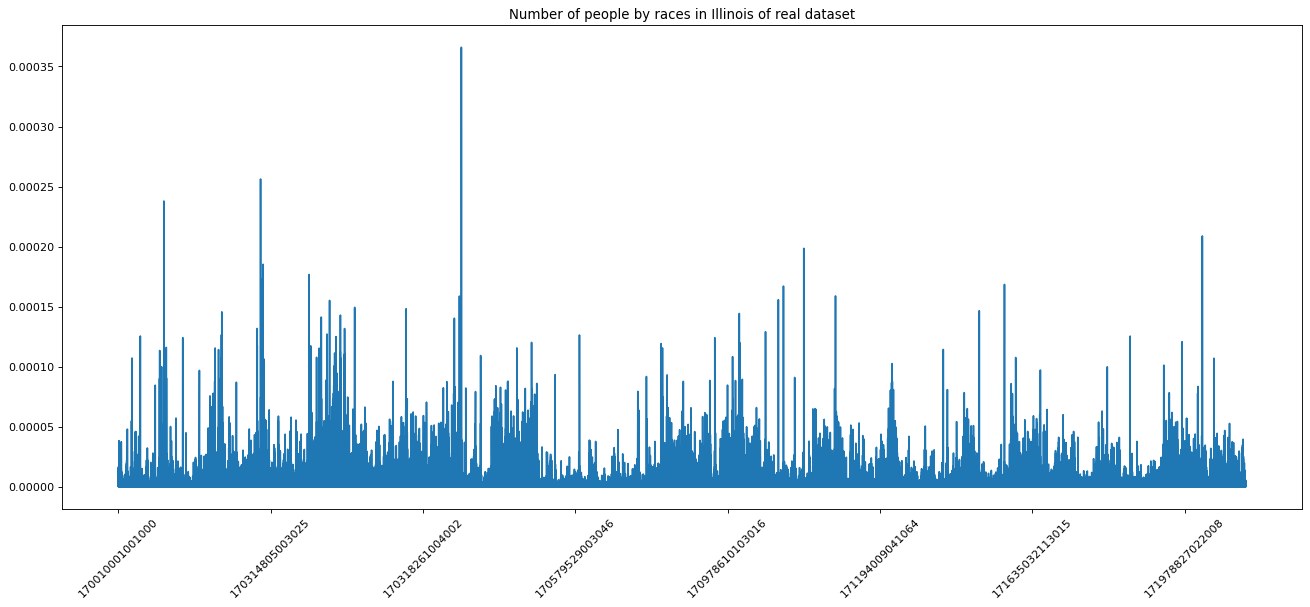

In [132]:
plt.figure(figsize=(20, 8), dpi=80)
popByFIPSReal.plot(x='Race', y='Population', rot=0)
plt.title("Number of people by races in Illinois of real dataset")
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

### Test for Homogeneity

$H_0$: The distributions of the two populations are the same.

$H_1$: The distributions of the two populations are not the same.


In [133]:
popByFIPSReal.name = "Real"
popByFIPSSynthesis.name = "Synthesis"
mergeddf = pd.merge(popByFIPSSynthesis, popByFIPSReal, how= 'outer', right_index = True,
               left_index = True).fillna(0)
mergeddf = mergeddf.astype({'Synthesis': 'float32'})
mergeddf

,Synthesis,Real
170010001001000,0.0,1.326759e-06
170010001001001,0.0,1.560893e-07
170010001001002,0.0,0.000000e+00
170010001001003,0.0,0.000000e+00
170010001001004,0.0,0.000000e+00
...,...,...
172030307003228,0.0,8.584912e-07
172030307003229,0.0,0.000000e+00
172030307003230,0.0,0.000000e+00
172030307003231,0.0,5.463126e-07


### Compare sample mean and standard deviation

In [134]:
print("Mean of synthetic dataset", mergeddf["Synthesis"].mean())
print("Standard deviation of synthetic dataset", mergeddf["Synthesis"].std())

Mean of synthetic dataset 2.7054081783717265e-06
Standard deviation of synthetic dataset 5.772825716121588e-06


In [135]:
print("Mean of real dataset", mergeddf["Real"].mean())
print("Standard deviation of real dataset", mergeddf["Real"].std())

Mean of real dataset 2.7028634135016203e-06
Standard deviation of real dataset 5.291909099026957e-06


### Binning FIPS

In [136]:
N = 100
mergeddf.index = mergeddf.index.map(lambda x : int(x))
binningdf = mergeddf.groupby(mergeddf.index // N).sum()
binningdf

,Synthesis,Real
1700100010010,0.000102,0.000089
1700100010020,0.000060,0.000058
1700100010030,0.000084,0.000072
1700100010040,0.000066,0.000071
1700100010050,0.000086,0.000073
...,...,...
1720303070010,0.000094,0.000081
1720303070020,0.000064,0.000063
1720303070030,0.000070,0.000084
1720303070031,0.000094,0.000101


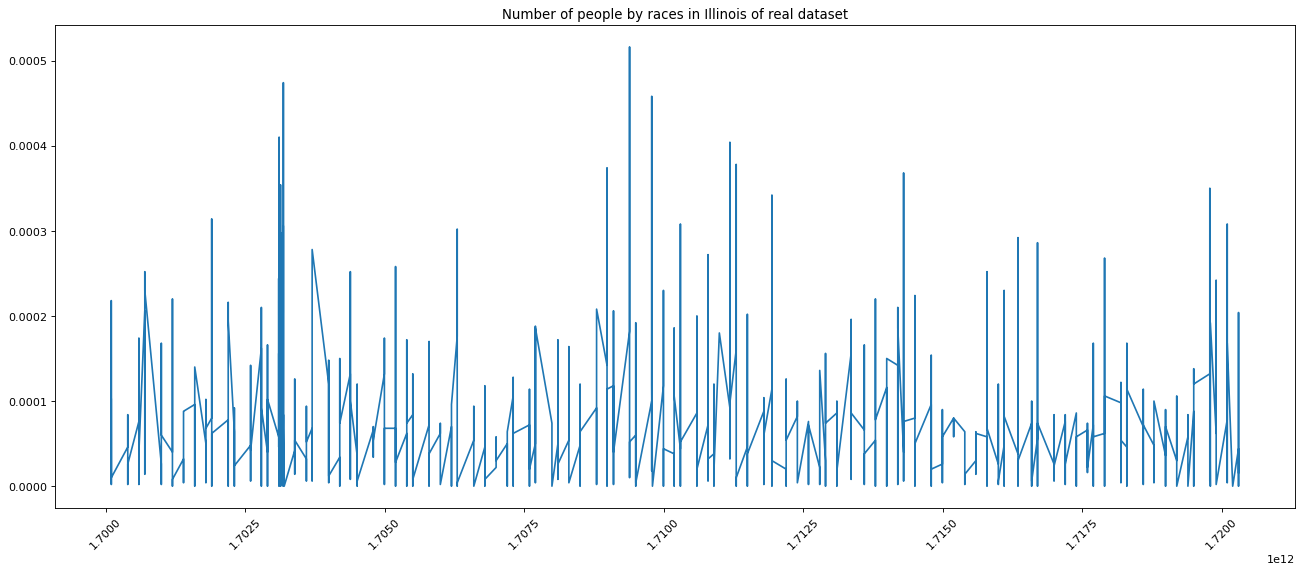

In [137]:
plt.figure(figsize=(20, 8), dpi=80)
binningdf["Synthesis"].plot(x='Race', y='Population', rot=0)
plt.title("Number of people by races in Illinois of real dataset")
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

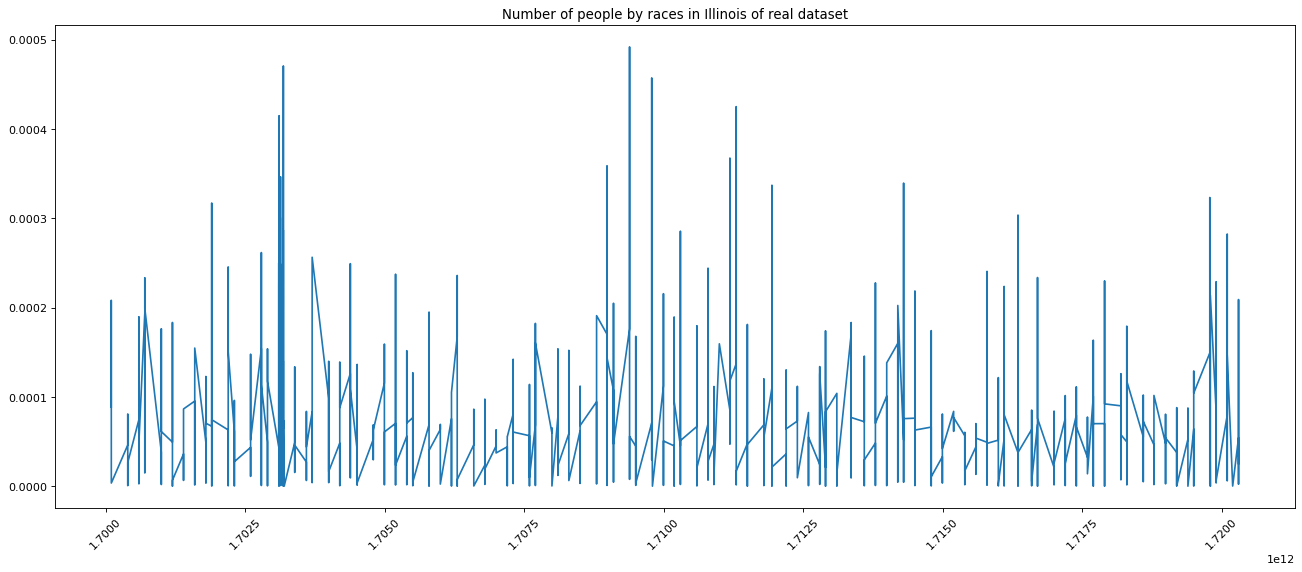

In [138]:
plt.figure(figsize=(20, 8), dpi=80)
binningdf["Real"].plot(x='Race', y='Population', rot=0)
plt.title("Number of people by races in Illinois of real dataset")
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

### Test for Homogeneity

$H_0$: The distributions of the two populations are the same.

$H_1$: The distributions of the two populations are not the same.


In [139]:
ct = pd.crosstab(binningdf["Real"], binningdf["Synthesis"], margins=True)
ct

Synthesis,0.0,1.9999999949504854e-06,3.999999989900971e-06,6.000000212225132e-06,7.999999979801942e-06,9.999999747378752e-06,1.2000000424450263e-05,1.3999999282532372e-05,1.4000000192027073e-05,1.5999999959603883e-05,...,0.00037200000951997936,0.00037399999564513564,0.00037799999699927866,0.00038400001358240843,0.0004039999912492931,0.00041000000783242285,0.00045800002408213913,0.00047400000039488077,0.0005160000291652977,All
Real,,,,,,,,,,,,,,,,,,,,,
0.0,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20
7.804465059331885e-08,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1.560893011866377e-07,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
2.3413395177995655e-07,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
3.121786023732754e-07,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.00042503116713121444,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
0.0004571855631756618,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
0.00047060924307771267,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [140]:
g, p, dof, expctd = stats.chi2_contingency(ct, lambda_="log-likelihood")

In [141]:
# interpret test-statistic
prob = 0.95
critical = stats.chi2.ppf(prob, dof)
if abs(g) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Independent (fail to reject H0)


In [142]:
p

1.0

Due to p value = 1.0 >> 0.05.Therefore, there is no evidence to support the distributions of the two populations are not the same.

### Compare distribution by two sample t-test

$H_0: \mu_1 = \mu_2$ (population mean of synthetic dataset is equal to real dataset)

$H_1: \mu_1 \neq \mu_2$ (population mean of synthetic dataset is different from real dataset)

In [143]:
# Perform the two sample t-test with equal variances
stats.ttest_ind(a=binningdf["Synthesis"], b=binningdf["Real"], equal_var=True)

Ttest_indResult(statistic=-4.967287854692018e-06, pvalue=0.9999960367245593)

Due to p value = 0.9934190781015679 >> 0.05.Therefore, there is no evidence to support the population mean of the two populations are not the same.

### K-S test

$H_0: $ The two datasets come from the same ditribution 

$H_q: $ The two datasets NOT come from the same ditribution 


In [144]:
stats.ks_2samp(binningdf["Real"], binningdf["Synthesis"])

KstestResult(statistic=0.028460665658093798, pvalue=0.00037309630620494536)

Due to p value = 0.4781688122978446 >> 0.05. Therefore, there is no evidence to support the two datasets NOT come from the same ditribution

## Benchmarking dataset

We will test the dataset by the 